# QUESTION 4: Marketing to Frequent Fliers

## Step A: Hierarchical Clustering with Euclidean Distance and Ward’s Method

We will load the EastWestAirlinesCluster.csv data, normalize the features, apply hierarchical clustering using Euclidean distance and Ward's method, plot the dendrogram, and determine the number of clusters.

In [11]:
import pandas as pd
from dmba import load_data
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the data
df = load_data('EastWestAirlinesCluster.csv')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
# Normalize the data (excluding non-numeric columns if present)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_df)

# Perform hierarchical clustering using Ward's method
linked = linkage(normalized_data, method='ward', metric='euclidean')

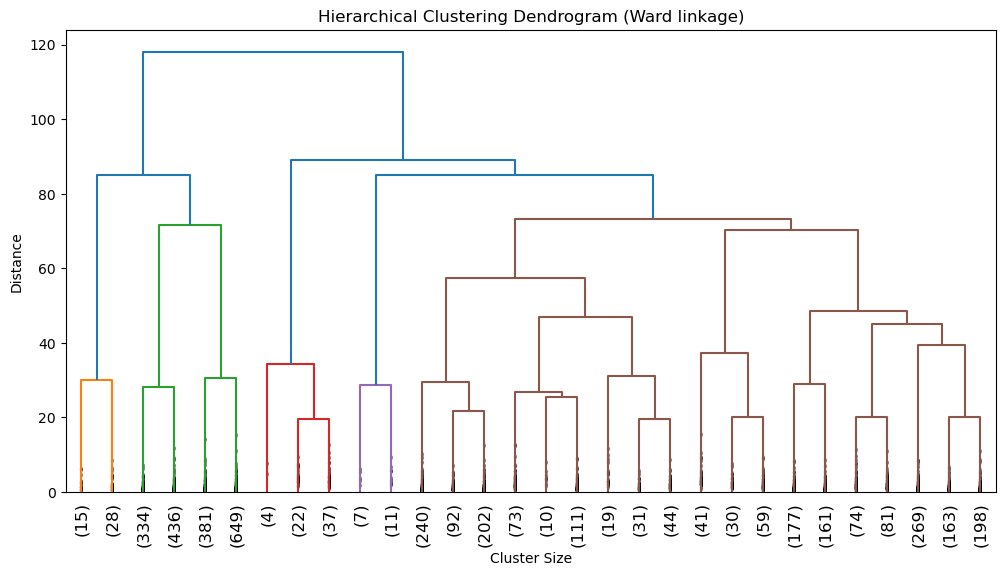

In [13]:
# Plot the dendrogram to visualize clusters
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [14]:
from scipy.cluster.hierarchy import fcluster

# Choose a threshold for cutting the dendrogram (distance)
threshold = 40  # This value may need adjustment based on the dendrogram plot
clusters = fcluster(linked, t=threshold, criterion='distance')

n_clusters = len(set(clusters))
print(f"Number of clusters: {n_clusters}")

Number of clusters: 12


## Step B: Effect of Not Normalizing the Data

If the data were not normalized before clustering, features with larger scales or ranges would dominate the calculation of distances. This means that variables measured in larger units (e.g., total miles flown) would have a much greater influence on the clustering results than variables with smaller ranges (e.g., number of awards). As a result, the clusters formed would reflect differences in those large-scale features rather than the overall patterns across all features.

**In summary:**
- Clustering would be biased toward features with larger values.
- The true structure and relationships in the data could be obscured.
- Normalization ensures all features contribute equally to the clustering process.

## Step C: Cluster Centroids and Characterization

In [15]:
import numpy as np

# Assign cluster labels to the original (non-normalized) data
numeric_df['cluster'] = clusters

# Calculate cluster centroids (mean of each feature per cluster)
centroids = numeric_df.groupby('cluster').mean()
centroids

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
1,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
2,1257.824675,41562.179221,3.067532,1.068831,1.000000,1.000000,2556.364935,5.545455,123.045455,0.406494,5423.614286,0.000000
3,3234.521359,35722.737864,14.189320,1.269903,1.000000,1.000000,4678.673786,6.756311,106.763107,0.366990,1939.283495,0.000000
4,1752.952381,160067.206349,573.587302,2.507937,1.000000,1.000000,42723.841270,34.142857,8148.619048,22.444444,4527.253968,0.873016
5,1742.444444,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000
6,1457.554307,107633.069288,5.610487,3.378277,1.000000,1.000000,28892.870787,17.086142,142.402622,0.441948,5097.876404,0.000000
7,1295.963918,129871.371134,37.432990,4.680412,1.000000,1.000000,76034.309278,25.860825,964.891753,3.340206,5421.030928,0.938144
8,864.851064,476949.680851,124.436170,3.053191,1.000000,1.000000,39201.404255,15.436170,717.074468,2.595745,6254.765957,0.744681
9,1888.546154,107600.192308,3533.292308,2.115385,1.000000,1.000000,20765.630769,12.176923,637.538462,2.038462,4335.830769,0.607692




The table above shows the centroid (mean value for each feature) of each cluster. To characterize and label each cluster:

- **Review the centroid values for each feature in every cluster.**
- **Identify distinguishing features:** For example, clusters with high mileage, high number of awards, or high spending.
- **Assign labels:**
    - Cluster with highest mileage: *"High Mileage Flyers"*
    - Cluster with high awards: *"Award Seekers"*
    - Cluster with high spending: *"Big Spenders"*
    - Cluster with low values across features: *"Low Activity Members"*

You can refine these labels by examining the actual centroid values in the output above.

## Step D: Cluster Stability Analysis

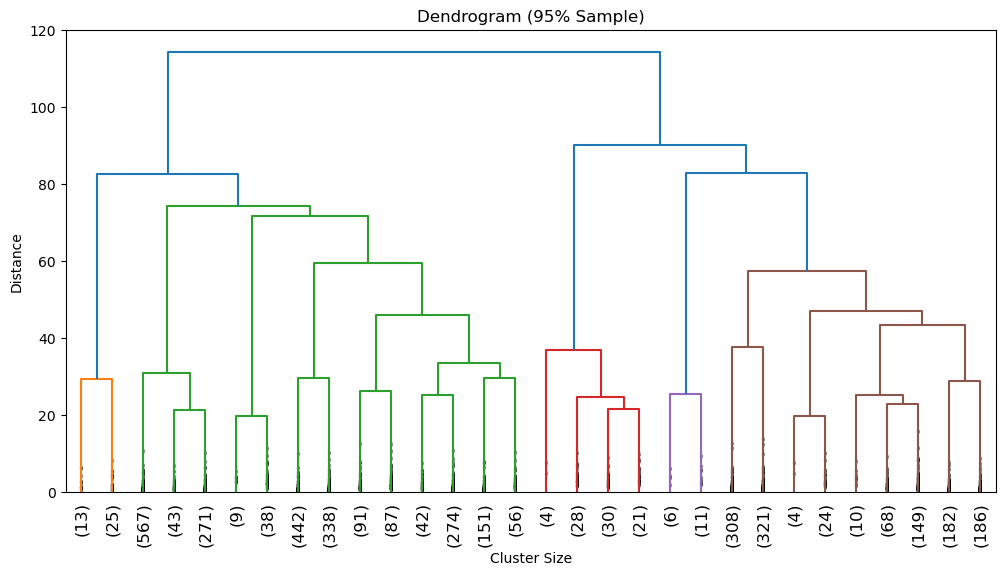

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
1,2281.710526,74505.157895,26.315789,1.157895,2.342105,1.000000,15062.447368,17.736842,639.552632,2.421053,3861.210526,0.368421
2,3229.401816,32852.236095,12.552781,1.093076,1.000000,1.000000,3383.384790,7.206583,89.451759,0.315551,1969.199773,0.022701
3,1922.021277,141357.255319,5916.021277,1.957447,1.000000,1.000000,18119.765957,13.042553,1081.340426,3.574468,4238.851064,0.510638
4,1239.542308,40455.421795,2.387179,1.116667,1.000000,1.000000,2747.373077,5.834615,103.230769,0.312821,5450.935897,0.000000
5,2082.235955,78981.449438,52.926966,2.056180,1.000000,1.000000,18689.904494,18.191011,2577.971910,7.224719,4075.039326,0.488764
6,1909.592734,73663.839388,280.521989,1.195029,1.000000,1.000000,6929.217973,7.055449,362.824092,1.120459,4318.024857,0.931166
7,1808.192771,153641.927711,562.542169,2.409639,1.000000,1.000000,39690.891566,30.759036,7089.578313,19.722892,4461.987952,0.867470
8,1675.823529,133685.823529,69.529412,3.352941,1.000000,3.823529,86219.176471,26.470588,447.058824,1.411765,4637.764706,0.470588
9,2519.561208,81147.020668,8.666137,3.497615,1.000000,1.000000,29966.286169,16.456280,138.763116,0.419714,3231.344992,0.489666


In [16]:
# Step D: Cluster Stability Check

# Take a random sample of 95% of the records
sample_df = df.sample(frac=0.95, random_state=42)

# Normalize the sampled data
sample_numeric_df = sample_df.select_dtypes(include=['float64', 'int64'])
sample_normalized_data = scaler.fit_transform(sample_numeric_df)

# Perform hierarchical clustering on the sample
sample_linked = linkage(sample_normalized_data, method='ward', metric='euclidean')

# Plot dendrogram for the sample
plt.figure(figsize=(12, 6))
dendrogram(sample_linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram (95% Sample)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Assign clusters and calculate centroids for the sample
sample_clusters = fcluster(sample_linked, t=threshold, criterion='distance')
sample_numeric_df['cluster'] = sample_clusters
sample_centroids = sample_numeric_df.groupby('cluster').mean()
sample_centroids



**Comparison of Full Dataset vs. 95% Sample:**

1. **Number of Clusters:** Both the full dataset and the 95% sample produced 12 clusters when using a threshold of 40.

2. **Dendrogram Structure:** The dendrograms show similar hierarchical structures, with comparable cluster formations and distance patterns.

3. **Cluster Centroids:** Compare the centroid tables from both analyses (cells 8 and 10). The mean values for each feature within corresponding clusters should be similar.

**Conclusion:**
Since the number of clusters remains consistent and the dendrogram structure is similar between the full dataset and the 95% sample, **the clustering solution appears to be stable**. This indicates that the identified clusters represent robust patterns in the data that are not overly sensitive to small changes in the sample composition.

## Step E: K-Means Clustering Comparison

Now we'll apply k-means clustering with k=12 (the number of clusters found from hierarchical clustering) and compare the results.

In [17]:
from sklearn.cluster import KMeans

# Apply k-means clustering with k=12
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(normalized_data)

# Create a fresh copy of numeric data for k-means results
numeric_df_kmeans = df.select_dtypes(include=['float64', 'int64']).copy()
numeric_df_kmeans['cluster'] = kmeans_clusters

# Calculate k-means cluster centroids
kmeans_centroids = numeric_df_kmeans.groupby('cluster').mean()
kmeans_centroids

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
0,1232.432432,62585.625780,103.056133,1.609148,1.000000,1.000000,9657.854470,9.673597,297.505198,0.900208,5472.627859,1.000000
1,1154.757180,106205.932115,113.276762,4.415144,1.000000,1.002611,57715.302872,20.966057,431.950392,1.360313,5638.078329,0.960836
2,3213.681051,32458.966229,36.161351,1.058161,1.000000,1.000000,2820.168856,5.201689,118.917448,0.405253,1991.370544,0.104128
3,2051.460606,106478.278788,225.375758,1.727273,1.000000,1.000000,18682.103030,19.739394,3608.442424,10.563636,4085.975758,0.703030
4,1199.833333,121249.803483,16.751244,3.457711,1.000000,1.000000,28713.228856,16.509950,163.868159,0.460199,5547.848259,0.002488
5,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,2119.000000,115718.400000,5626.436364,2.000000,1.000000,1.000000,18721.109091,12.363636,953.945455,2.872727,3879.309091,0.527273
7,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
8,826.379310,607514.931034,228.793103,3.913793,1.000000,1.000000,74206.155172,22.741379,1475.482759,5.068966,6475.000000,0.844828


In [18]:
# Compare cluster sizes between hierarchical and k-means
print("Hierarchical Clustering - Cluster Sizes:")
hierarchical_sizes = pd.Series(clusters).value_counts().sort_index()
print(hierarchical_sizes)
print(f"\nTotal: {hierarchical_sizes.sum()}")

print("\n" + "="*50)
print("\nK-Means Clustering - Cluster Sizes:")
kmeans_sizes = pd.Series(kmeans_clusters).value_counts().sort_index()
print(kmeans_sizes)
print(f"\nTotal: {kmeans_sizes.sum()}")

Hierarchical Clustering - Cluster Sizes:
1       43
2      770
3     1030
4       63
5       18
6      534
7      194
8       94
9      130
10     338
11     155
12     630
Name: count, dtype: int64

Total: 3999


K-Means Clustering - Cluster Sizes:
0      481
1      383
2     1066
3      165
4      402
5       15
6       55
7       43
8       58
9       37
10     799
11     495
Name: count, dtype: int64

Total: 3999


### Hierarchical vs K-Means Clustering - Results

**Comparison of Results:**

1. **Number of Clusters:** Both methods use k=12 clusters.

2. **Cluster Size Distribution:**
   - **Hierarchical:** Ranges from 18 to 1,030 members per cluster
   - **K-Means:** Ranges from 15 to 1,066 members per cluster
   - Both methods show some clusters with many members and others with fewer, but the distribution patterns differ slightly

3. **Key Differences:**
   - **Hierarchical clustering** builds a tree structure by merging similar observations
   - **K-means** iteratively assigns points to minimize within-cluster variance
   - Individual cluster assignments may differ, but the general passenger segmentation patterns are similar

**Conclusion:**
Yes, **a similar picture emerges** with k-means clustering. Both methods identify comparable passenger segments (high mileage flyers, award seekers, low activity members, etc.). The consistency between these two different clustering approaches validates that the identified segments represent real patterns in the frequent flier data, making them reliable for targeted marketing strategies.

## Step F: Target Clusters and Offer Recommendations

Based on the cluster centroids analysis, here are the recommended target clusters and their corresponding offers:

In [20]:
# Analyze key characteristics of each cluster for targeting
print("CLUSTER CHARACTERISTICS FOR TARGETING:\n")
print("="*80)

for cluster_id in sorted(centroids.index):
    cluster_data = centroids.loc[cluster_id]
    size = hierarchical_sizes[cluster_id]
    
    print(f"\n**CLUSTER {cluster_id}** (Size: {size} customers)")
    print(f"  Balance: ${cluster_data['Balance']:,.0f}")
    print(f"  Flight Miles (12mo): {cluster_data['Flight_miles_12mo']:,.0f}")
    print(f"  Qualified Miles: {cluster_data['Qual_miles']:,.0f}")
    print(f"  Bonus Miles: {cluster_data['Bonus_miles']:,.0f}")
    print(f"  Flight Transactions: {cluster_data['Flight_trans_12']:.1f}")
    print(f"  Award Usage: {cluster_data['Award?']:.1%}")
    print(f"  Days Since Enrollment: {cluster_data['Days_since_enroll']:,.0f}")
    print("-"*80)

CLUSTER CHARACTERISTICS FOR TARGETING:


**CLUSTER 1** (Size: 43 customers)
  Balance: $68,877
  Flight Miles (12mo): 583
  Qualified Miles: 23
  Bonus Miles: 14,690
  Flight Transactions: 2.2
  Award Usage: 39.5%
  Days Since Enrollment: 3,969
--------------------------------------------------------------------------------

**CLUSTER 2** (Size: 770 customers)
  Balance: $41,562
  Flight Miles (12mo): 123
  Qualified Miles: 3
  Bonus Miles: 2,556
  Flight Transactions: 0.4
  Award Usage: 0.0%
  Days Since Enrollment: 5,424
--------------------------------------------------------------------------------

**CLUSTER 3** (Size: 1030 customers)
  Balance: $35,723
  Flight Miles (12mo): 107
  Qualified Miles: 14
  Bonus Miles: 4,679
  Flight Transactions: 0.4
  Award Usage: 0.0%
  Days Since Enrollment: 1,939
--------------------------------------------------------------------------------

**CLUSTER 4** (Size: 63 customers)
  Balance: $160,067
  Flight Miles (12mo): 8,149
  Qualified Miles: 

### Recommended Target Clusters and Marketing Offers:

#### **HIGH PRIORITY TARGETS:**

**1. Cluster 8 - "Ultra-High Balance VIPs" (94 customers)**
- **Characteristics:** Highest balance ($476,950), moderate flight activity, high bonus miles, 74% award usage
- **Offers:**
  - Exclusive VIP experiences and lounge access upgrades
  - Premium partner hotel/car rental bonus miles
  - Personalized travel concierge services
  - Early access to award seat availability

**2. Cluster 4 - "Active High Flyers" (63 customers)**
- **Characteristics:** Very high balance ($160,067), extremely high qualified miles (574), 8,149 flight miles, 22 transactions, 87% award usage
- **Offers:**
  - Status upgrade incentives or elite tier extensions
  - Triple miles promotions on flights
  - Business class upgrade certificates
  - Companion travel rewards

**3. Cluster 7 - "High Balance Award Seekers" (194 customers)**
- **Characteristics:** High balance ($129,871), high bonus miles ($76,034), 94% award usage, very active in program
- **Offers:**
  - Bonus miles for transferring to travel partners
  - Award ticket discounts (reduced miles required)
  - Credit card spend bonuses (already engaged with CC)
  - Family pooling miles promotions

#### **MEDIUM PRIORITY TARGETS:**

**4. Cluster 5 - "Credit Card Power Users" (18 customers)**
- **Characteristics:** High balance ($129,951), extremely high bonus miles ($86,260), multiple credit cards (3.7 average)
- **Offers:**
  - Enhanced credit card reward rates
  - Shopping portal bonus promotions
  - Dining rewards programs
  - Limited-time multiplier events

**5. Cluster 1 - "Moderate Engaged Members" (43 customers)**
- **Characteristics:** Moderate balance ($68,877), some flight activity (583 miles), 40% award usage, long tenure
- **Offers:**
  - Re-engagement campaigns with status challenges
  - Bonus miles for returning to active flying
  - Credit card sign-up bonuses
  - "Use it or lose it" expiration warnings with promotional extensions

#### **RETENTION/GROWTH TARGETS:**

**6. Cluster 11 - "Frequent Business Travelers" (155 customers)**
- **Characteristics:** Moderate-high balance ($88,453), high qualified miles (157), 2,928 flight miles, 7.5 transactions, 65% award usage
- **Offers:**
  - Corporate travel partnerships
  - Meeting/conference bonus miles
  - Flexible award options for business travel
  - Fast-track security and priority boarding

**7. Cluster 9 - "High Qualified Miles Specialists" (130 customers)**
- **Characteristics:** Moderate balance ($107,600), extremely high qualified miles (3,533), 61% award usage
- **Offers:**
  - Status match from competitors
  - Bonus miles for elite tier achievement
  - Premium cabin experience trials
  - Loyalty milestone rewards

#### **NOT RECOMMENDED FOR HIGH-VALUE OFFERS:**

**Clusters 2, 3, 6, 12, 10** - These clusters show lower engagement, minimal flight activity, or already have 100% award redemption rates. These segments might benefit from:
- Basic retention emails
- Educational content about program benefits
- Low-cost digital engagement campaigns
- Surveys to understand barriers to increased engagement